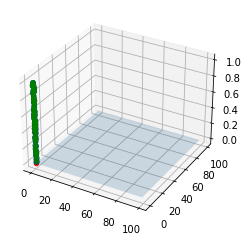

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


class Surface:
    def __init__(self, min_east, min_north, max_east, max_north, num_rows, num_cols, surface_grid):
        self.minEast = min_east
        self.minNorth = min_north
        self.maxEast = max_east
        self.maxNorth = max_north
        self.numRows = num_rows
        self.numCols = num_cols
        self.surfaceGrid = surface_grid

def calculate_normal_vector(strike, dip):
    strike_rad = np.radians(strike)
    dip_rad = np.radians(dip)

    normal_vector = [
        np.sin(strike_rad) * np.sin(dip_rad),
        -np.cos(strike_rad) * np.sin(dip_rad),
        np.cos(dip_rad)
    ]
    return normal_vector

def find_fault_intersection(surface, fault_point, normal_vector, threshold):
    intersections = []
    for row in surface.surfaceGrid:
        for point in row:
            distance = np.dot(normal_vector, np.subtract(point, fault_point))
            if abs(distance) < threshold:
                intersections.append(point)
    return intersections

def plot_surface_and_fault(surface, fault_point, normal_vector, intersections):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Визуализация поверхности
    for row in surface.surfaceGrid:
        xs, ys, zs = zip(*row)
        ax.scatter(xs, ys, zs, color='b')

    # Визуализация точки разлома
    ax.scatter(*fault_point, color='r')

    # Визуализация плоскости разлома
    point = np.array(fault_point)
    d = -point.dot(normal_vector)
    xx, yy = np.meshgrid(range(int(surface.minEast), int(surface.maxEast)), range(int(surface.minNorth), int(surface.maxNorth)))
    zz = (-normal_vector[0] * xx - normal_vector[1] * yy - d) * 1. /normal_vector[2]
    ax.plot_surface(xx, yy, zz, alpha=0.2)

    # Визуализация точек пересечения
    if intersections:
        ix, iy, iz = zip(*intersections)
        ax.scatter(ix, iy, iz, color='g')

    plt.show()

# Пример использования
surface = Surface(0, 0, 100, 100, 10, 10, np.random.rand(10, 10, 3))  # Пример поверхности
fault_point = [0, 0, 0]  # Пример точки разлома
dip_angle = 0
strike_angle = 0
threshold = 1  # Установите пороговое значение в зависимости от масштаба данных

normal_vector = calculate_normal_vector(strike_angle, dip_angle)
intersections = find_fault_intersection(surface, fault_point, normal_vector, threshold)
    
# Визуализация
plot_surface_and_fault(surface, fault_point, normal_vector, intersections)
